In [108]:
import pandas as pd
import numpy as np
import csv
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
!pip install matplotlib

**Task 1: Data Acquisition & Preparation**

In [110]:
#Load data
df1=pd.read_csv('data1.csv', na_values= ['n/a','\s+','N/A'], delimiter=';')

In [111]:
df1

,ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International
0,2541,1,7,1,9147,1,3,120.0,1,1,...,7,120.0,0,0,0,1,0,0,333,0
1,2554,1,17,1,9991,0,1,160.0,1,34,...,0,161.8,1,0,1,1,1,0,333,0
2,2790,1,39,1,171,1,1,133.1,1,37,...,7,100.0,0,0,1,1,1,1,333,0
3,2799,1,42,1,9500,1,1,150.0,1,19,...,3,110.0,1,0,0,1,1,1,333,0
4,2883,2,39,1,9991,0,1,133.1,1,37,...,9,113.4,0,0,0,1,0,0,333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1955,1,1,4,9500,1,1,140.0,1,3,...,3,133.8,1,0,0,1,0,0,17,0
3420,2028,1,1,2,171,1,1,127.0,1,3,...,3,133.5,1,0,0,1,1,0,17,0
3421,2068,1,17,5,9070,1,1,133.0,1,4,...,4,132.0,1,1,0,1,0,1,17,0
3422,3309,1,1,6,9500,1,1,140.0,1,19,...,4,133.3,1,0,0,1,0,1,17,0


In [112]:
df1.head()

,ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International
0,2541,1,7,1,9147,1,3,120.0,1,1,...,7,120.0,0,0,0,1,0,0,333,0
1,2554,1,17,1,9991,0,1,160.0,1,34,...,0,161.8,1,0,1,1,1,0,333,0
2,2790,1,39,1,171,1,1,133.1,1,37,...,7,100.0,0,0,1,1,1,1,333,0
3,2799,1,42,1,9500,1,1,150.0,1,19,...,3,110.0,1,0,0,1,1,1,333,0
4,2883,2,39,1,9991,0,1,133.1,1,37,...,9,113.4,0,0,0,1,0,0,333,0


In [113]:
df1.shape

(3424, 22)

In [114]:
df2=pd.read_csv('data2.csv', na_values= ['n/a','\s+','N/A'], delimiter=';')

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              3424 non-null   int64  
 1   Curricular units 1st sem (credited)             3424 non-null   int64  
 2   Curricular units 1st sem (enrolled)             3424 non-null   int64  
 3   Curricular units 1st sem (evaluations)          3424 non-null   int64  
 4   Curricular units 1st sem (approved)             3424 non-null   int64  
 5   Curricular units 1st sem (grade)                3424 non-null   float64
 6   Curricular units 1st sem (without evaluations)  3424 non-null   int64  
 7   Curricular units 2nd sem (credited)             3424 non-null   int64  
 8   Curricular units 2nd sem (enrolled)             3424 non-null   int64  
 9   Curricular units 2nd sem (evaluations)   

In [116]:
df2.head()

,ID,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,0,0,0,0,0.0,0,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,3,0,6,0,0,0.0,0,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,8,0,5,5,0,0.0,0,0,5,5,0,0.0,0,15.5,2.8,-4.06,Dropout
3,10,0,6,9,5,11.4,0,0,6,14,2,13.5,0,8.9,1.4,3.51,Dropout
4,13,0,6,6,0,0.0,0,0,6,0,0,0.0,0,12.7,3.7,-1.70,Dropout


In [117]:
df2.shape

(3424, 17)

In [118]:
df3=pd.read_csv('data3.csv', na_values= ['n/a','\s+','N/A'], delimiter=';')

In [119]:
df3.head()

,ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,239,1,1,1,9130,1,1,126.0,1,19,...,0,5,10,4,14.250000,0,9.4,-0.8,-3.12,Dropout
1,240,1,39,1,9085,1,19,133.1,1,19,...,1,6,14,3,10.333333,0,16.2,0.3,-0.92,Dropout
2,244,1,39,1,9147,1,1,120.0,1,37,...,0,5,9,0,0.000000,0,10.8,1.4,1.74,Dropout
3,248,1,44,1,9003,1,39,130.0,1,37,...,0,6,8,3,11.333333,0,13.9,-0.3,0.79,Dropout
4,256,2,39,1,9556,1,19,133.1,1,38,...,0,7,12,0,0.000000,0,8.9,1.4,3.51,Dropout


In [120]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              1000 non-null   int64  
 1   Marital status                                  1000 non-null   int64  
 2   Application mode                                1000 non-null   int64  
 3   Application order                               1000 non-null   int64  
 4   Course                                          1000 non-null   int64  
 5   Daytime/evening attendance                      1000 non-null   int64  
 6   Previous qualification                          1000 non-null   int64  
 7   Previous qualification (grade)                  1000 non-null   float64
 8   Nationality                                     1000 non-null   int64  
 9   Mother's qualification                    

In [121]:
df3.shape

(1000, 38)

In [122]:
#merge data
df1_2=pd.merge(df1, df2, on='ID')
df1_2.shape

(3424, 38)

In [123]:
 df1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              3424 non-null   int64  
 1   Marital status                                  3424 non-null   int64  
 2   Application mode                                3424 non-null   int64  
 3   Application order                               3424 non-null   int64  
 4   Course                                          3424 non-null   int64  
 5   Daytime/evening attendance                      3424 non-null   object 
 6   Previous qualification                          3424 non-null   int64  
 7   Previous qualification (grade)                  3424 non-null   float64
 8   Nationality                                     3424 non-null   int64  
 9   Mother's qualification                   

In [124]:
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              3424 non-null   int64  
 1   Marital status                                  3424 non-null   int64  
 2   Application mode                                3424 non-null   int64  
 3   Application order                               3424 non-null   int64  
 4   Course                                          3424 non-null   int64  
 5   Daytime/evening attendance                      3424 non-null   object 
 6   Previous qualification                          3424 non-null   int64  
 7   Previous qualification (grade)                  3424 non-null   float64
 8   Nationality                                     3424 non-null   int64  
 9   Mother's qualification                   

In [125]:
df = pd.concat([df1_2, df3])
df.shape

(4424, 38)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4424 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance                      4424 non-null   object 
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nationality                                     4424 non-null   int64  
 9   Mother's qualification                         

In [127]:
print(df.describe(include = [np.number]))
print("*"*100)
print(df.describe(include = object))

                ID  Marital status  Application mode  Application order  \
count  4424.000000     4424.000000       4424.000000        4424.000000   
mean   2212.500000        1.178571         18.669078           1.727848   
std    1277.243125        0.605747         17.484682           1.313793   
min       1.000000        1.000000          1.000000           0.000000   
25%    1106.750000        1.000000          1.000000           1.000000   
50%    2212.500000        1.000000         17.000000           1.000000   
75%    3318.250000        1.000000         39.000000           2.000000   
max    4424.000000        6.000000         57.000000           9.000000   

            Course  Previous qualification  Previous qualification (grade)  \
count  4424.000000             4424.000000                     4424.000000   
mean   8856.642631                4.577758                      132.613314   
std    2063.566416               10.216592                       13.188332   
min      33.

__Data cleansing__

In [128]:
#detect null values
df.isnull().values.any()
df.isnull().sum()

ID                                                  0
Marital status                                      0
Application mode                                    0
Application order                                   0
Course                                              0
Daytime/evening attendance                          0
Previous qualification                              0
Previous qualification (grade)                      0
Nationality                                         0
Mother's qualification                              0
Father's qualification                              0
Mother's occupation                                 0
Father's occupation                                 0
Admission grade                                     0
Displaced                                           0
Educational special needs                           0
Debtor                                              0
Tuition fees up to date                           864
Gender                      

In [129]:
#check null columns and rows
print(df.isnull().any().sum()) #column
print(df.isnull().any(axis=1).sum()) #row

2
994


In [130]:
#display cols with missing values
df[df.columns[df.isnull().any() == True]] 

,Tuition fees up to date,International
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
995,NaN,1.0
996,NaN,1.0
997,NaN,1.0
998,NaN,1.0


In [131]:
df["Tuition fees up to date"].value_counts(dropna=False)

Tuition fees up to date
1.0    3032
NaN     864
0.0     528
Name: count, dtype: int64

In [132]:
#Fill null
df["Tuition fees up to date"]=df["Tuition fees up to date"].fillna(df["Tuition fees up to date"].mode())
df["Tuition fees up to date"].value_counts(dropna=False)

Tuition fees up to date
1.0    3032
NaN     864
0.0     528
Name: count, dtype: int64

In [133]:
df["International"].value_counts(dropna=False)

International
0.0    3337
NaN     977
1.0     110
Name: count, dtype: int64

In [134]:
df["International"]=df["International"].fillna(df["International"].mode())
df["International"].value_counts(dropna=False)

International
0.0    3338
NaN     976
1.0     110
Name: count, dtype: int64

In [135]:
print(df.isnull().any().sum()) #column
print(df.isnull().any(axis=1).sum()) #row

2
993


In [136]:
#delete white space
df=df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\khcha\AppData\Local\Temp\ipykernel_11532\2544200025.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [137]:
print(df.isnull().any().sum()) #column
print(df.isnull().any(axis=1).sum()) #row

2
993


In [138]:
df.describe(include="all").loc[['min','max']].T

,min,max
ID,1.0,4424.0
Marital status,1.0,6.0
Application mode,1.0,57.0
Application order,0.0,9.0
Course,33.0,9991.0
Daytime/evening attendance,NaN,NaN
Previous qualification,1.0,43.0
Previous qualification (grade),95.0,190.0
Nationality,1.0,109.0
Mother's qualification,1.0,44.0


In [139]:
df["Daytime/evening attendance"].value_counts(dropna= False).sort_values(ascending=False)

Daytime/evening attendance
1    3051
1     883
0     366
0     117
Y       7
Name: count, dtype: int64

In [140]:
#detect entry issues
df["Daytime/evening attendance"]=df["Daytime/evening attendance"].replace('Y','1')
df["Daytime/evening attendance"].value_counts(dropna= False).sort_values(ascending=False)

Daytime/evening attendance
1    3058
1     883
0     366
0     117
Name: count, dtype: int64

In [141]:
df["Daytime/evening attendance"]= df["Daytime/evening attendance"].str.strip()

In [142]:
df["Daytime/evening attendance"].value_counts(dropna= False).sort_values(ascending=False)

Daytime/evening attendance
1      3058
NaN    1000
0       366
Name: count, dtype: int64

In [143]:
# Convert the column to numeric, forcing errors to NaN
df["Daytime/evening attendance"] = pd.to_numeric(df["Daytime/evening attendance"], errors='coerce')

# Fill NaN values with the median
median_value = df["Daytime/evening attendance"].median()
df["Daytime/evening attendance"] = df["Daytime/evening attendance"].fillna(median_value)

# Convert the column to integer
df["Daytime/evening attendance"] = df["Daytime/evening attendance"].astype(int)


In [144]:
#df["Daytime/evening attendance"] = df["Daytime/evening attendance"].fillna(df["Daytime/evening attendance"].median()).astype(int)

In [145]:
df["Daytime/evening attendance"].value_counts()

Daytime/evening attendance
1    4058
0     366
Name: count, dtype: int64

In [146]:
df["Daytime/evening attendance"].describe(include='all')

count    4424.000000
mean        0.917269
std         0.275506
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Daytime/evening attendance, dtype: float64

In [147]:
df["Father's qualification"].value_counts(dropna= False).sort_values(ascending=False)

Father's qualification
37    942
19    755
1     691
38    557
37    267
1     213
19    212
3     208
38    145
34     81
3      74
2      49
12     34
34     31
4      29
2      19
39     14
5      13
4      10
11      7
36      7
39      6
5       5
12      4
40      4
9       4
14      3
11      3
29      3
22      3
30      3
26      2
35      2
18      1
25      1
41      1
20      1
31      1
6       1
27      1
10      1
44      1
13      1
        1
33      1
43      1
42      1
40      1
22      1
6       1
10      1
43      1
14      1
41      1
9       1
36      1
30      1
Name: count, dtype: int64

In [148]:
df["Father's qualification"].describe(include='all')

count     4424
unique      57
top         37
freq       942
Name: Father's qualification, dtype: object

In [149]:
#find location of null value
indices = np.where(df["Father's qualification"] == "")
print(indices)

(array([2598], dtype=int64),)


In [150]:
#null value row
df.iloc[2598]

ID                                                       11
Marital status                                            1
Application mode                                          1
Application order                                         1
Course                                                 9670
Daytime/evening attendance                                1
Previous qualification                                    1
Previous qualification (grade)                        139.0
Nationality                                               1
Mother's qualification                                   38
Father's qualification                                     
Mother's occupation                                       5
Father's occupation                                       7
Admission grade                                       130.6
Displaced                                                 1
Educational special needs                                 0
Debtor                                  

In [151]:
df["Father's qualification"]=pd.to_numeric(df["Father's qualification"], errors="coerce")
df["Father's qualification"]=df["Father's qualification"].astype('Int64')

In [152]:
df["Father's qualification"]=df["Father's qualification"].fillna(df["Father's qualification"].mode())

In [153]:
df.iloc[2598]

ID                                                       11
Marital status                                            1
Application mode                                          1
Application order                                         1
Course                                                 9670
Daytime/evening attendance                                1
Previous qualification                                    1
Previous qualification (grade)                        139.0
Nationality                                               1
Mother's qualification                                   38
Father's qualification                                 <NA>
Mother's occupation                                       5
Father's occupation                                       7
Admission grade                                       130.6
Displaced                                                 1
Educational special needs                                 0
Debtor                                  

In [154]:
df["Father's qualification"].describe()

count       4423.0
mean     22.276057
std      15.344764
min            1.0
25%            3.0
50%           19.0
75%           37.0
max           44.0
Name: Father's qualification, dtype: Float64

In [155]:
df["Target"].value_counts(dropna= False).sort_values(ascending=False)

Target
Graduate    2206
Dropout     1417
Enrolled     792
Dropot         3
Grduate        3
enroled        2
Drpout         1
Name: count, dtype: int64

In [156]:
#remove data entry issue
df=df.replace({'Target' : { 'Dropot' : 'Dropout', 'Grduate' : 'Graduate', 'enroled' : 'Enrolled','Drpout' : 'Dropout' }})

In [157]:
df["Target"].value_counts(dropna= False).sort_values(ascending=False)

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [158]:
#detect impossible value
df[df['Age at enrollment']>70]['Age at enrollment'].count()

22

In [159]:
high_age=df[df['Age at enrollment']>70]
high_age['Age at enrollment'].value_counts()

Age at enrollment
333    17
222     3
444     2
Name: count, dtype: int64

In [160]:
df['Age at enrollment'][df['Age at enrollment']>70].value_counts()

Age at enrollment
333    17
222     3
444     2
Name: count, dtype: int64

In [161]:
df=df.replace({'Age at enrollment' : { 333: 33, 222 : 22, 444 : 44}})

In [162]:
df['Age at enrollment'].describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

In [163]:
#detect duplicate data
print(df["ID"].duplicated().sum())
print(df.duplicated().sum())

0
0


In [164]:
df.drop_duplicates(inplace = True) #delete the data from the table inplace= True
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4424 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance                      4424 non-null   int32  
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nationality                                     4424 non-null   int64  
 9   Mother's qualification                         

In [165]:
df["Tuition fees up to date"]=df["Tuition fees up to date"].astype('Int64')
df["International"]=df["International"].astype('Int64')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4424 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   int64  
 1   Marital status                                  4424 non-null   int64  
 2   Application mode                                4424 non-null   int64  
 3   Application order                               4424 non-null   int64  
 4   Course                                          4424 non-null   int64  
 5   Daytime/evening attendance                      4424 non-null   int32  
 6   Previous qualification                          4424 non-null   int64  
 7   Previous qualification (grade)                  4424 non-null   float64
 8   Nationality                                     4424 non-null   int64  
 9   Mother's qualification                         

In [166]:
df["Admission grade"].describe()

count    4424.000000
mean      126.978119
std        14.482001
min        95.000000
25%       117.900000
50%       126.100000
75%       134.800000
max       190.000000
Name: Admission grade, dtype: float64

**Task2.1:Visualising categorical and numerical values**

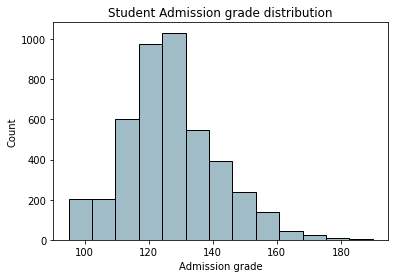

In [167]:
df = df.reset_index()
g1=sns.histplot(data=df, x="Admission grade" ,color="#80A6B3",bins=13).set(title="Student Admission grade distribution")

C:\Users\khcha\AppData\Local\Temp\ipykernel_11532\3508465402.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g2=sns.catplot(data=df, x="Target", kind="count", palette="blend:#7AB,#EDA",legend=True).set(title="Number of Student Based on Target")


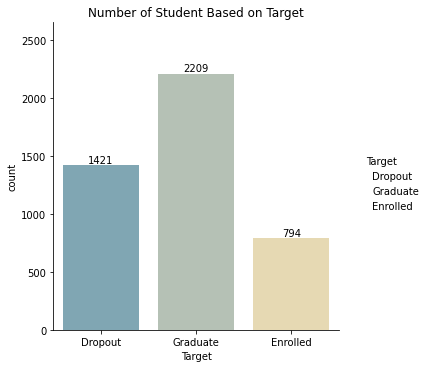

In [168]:
g2=sns.catplot(data=df, x="Target", kind="count", palette="blend:#7AB,#EDA",legend=True).set(title="Number of Student Based on Target")
for ax in g2.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

#ref:https://stackoverflow.com/questions/55586912/seaborn-catplot-set-values-over-the-bars


**Task2.2:Exploring relationships**


In [169]:
g3=df.groupby(["Marital status"])["Age at enrollment"].mean()
print(round(g3,2))

Marital status
1    21.53
2    36.72
3    33.00
4    38.40
5    30.88
6    41.83
Name: Age at enrollment, dtype: float64


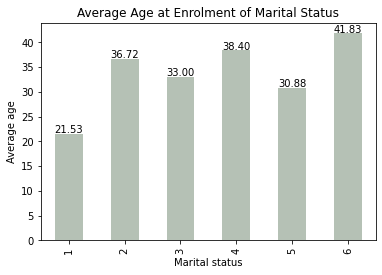

In [170]:
g3.plot(kind="bar", color="#B5C1B5",title="Average Age at Enrolment of Marital Status")
plt.ylabel("Average age")

ax = plt.gca()

# Annotate each bar with its respective value
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()  
    label = "{:.2f}".format(y) 

    # Add the label to the plot
    ax.annotate(label,
                (x, y), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,1), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center
plt.show()

#ref: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

In [171]:
g4_total=df.groupby(['Course'])['ID'].count().sort_values(ascending=False)
g4_total

Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: ID, dtype: int64

In [172]:
#%of Target droup out in each course
g4_num=df[df["Target"]=="Dropout"].groupby(['Course'])['ID'].count()
g4=g4_num*100/g4_total
print(round(g4.sort_values(ascending=False)),2)

Course
33      67.0
9130    55.0
9119    54.0
9991    51.0
9853    44.0
9003    41.0
9556    38.0
171     38.0
9254    38.0
9670    35.0
9147    35.0
8014    33.0
9773    31.0
9085    27.0
9070    23.0
9238    18.0
9500    15.0
Name: ID, dtype: float64 2


Text(0, 0.5, '%of droup out')

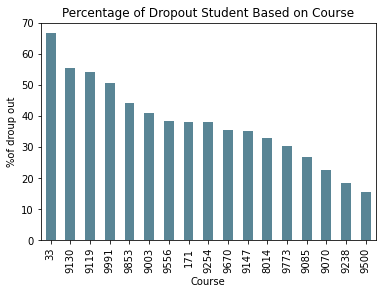

In [173]:
g4.sort_values(ascending=False).plot(kind='bar',color="#598595",title="Percentage of Dropout Student Based on Course")
plt.ylabel("%of droup out")

In [174]:
g5=df.groupby(["Course","Scholarship holder"])["Curricular units 1st sem (grade)"].mean()
print(round(g5,2))

Course  Scholarship holder
33      0                      9.64
171     0                      2.08
        1                      2.03
8014    0                     10.18
        1                     12.14
9003    0                     10.14
        1                     12.62
9070    0                     11.75
        1                     12.83
9085    0                     11.53
        1                     13.49
9119    0                      8.18
        1                     11.44
9130    0                     10.28
        1                      8.12
9147    0                      9.60
        1                     12.16
9238    0                     10.63
        1                     12.19
9254    0                     10.04
        1                     11.54
9500    0                     12.06
        1                     13.18
9556    0                      9.61
        1                     11.92
9670    0                     10.93
        1                     12.49
9

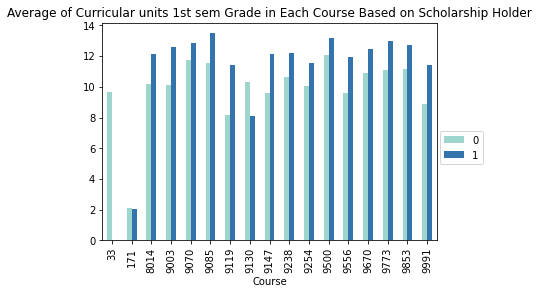

In [175]:
g5.unstack().plot(kind="bar",color = ["#9ED5CD","#3474AC"],title="Average of Curricular units 1st sem Grade in Each Course Based on Scholarship Holder")
plt.legend(loc=(1.01,.35))

**Task2.3:Scatter matrix**

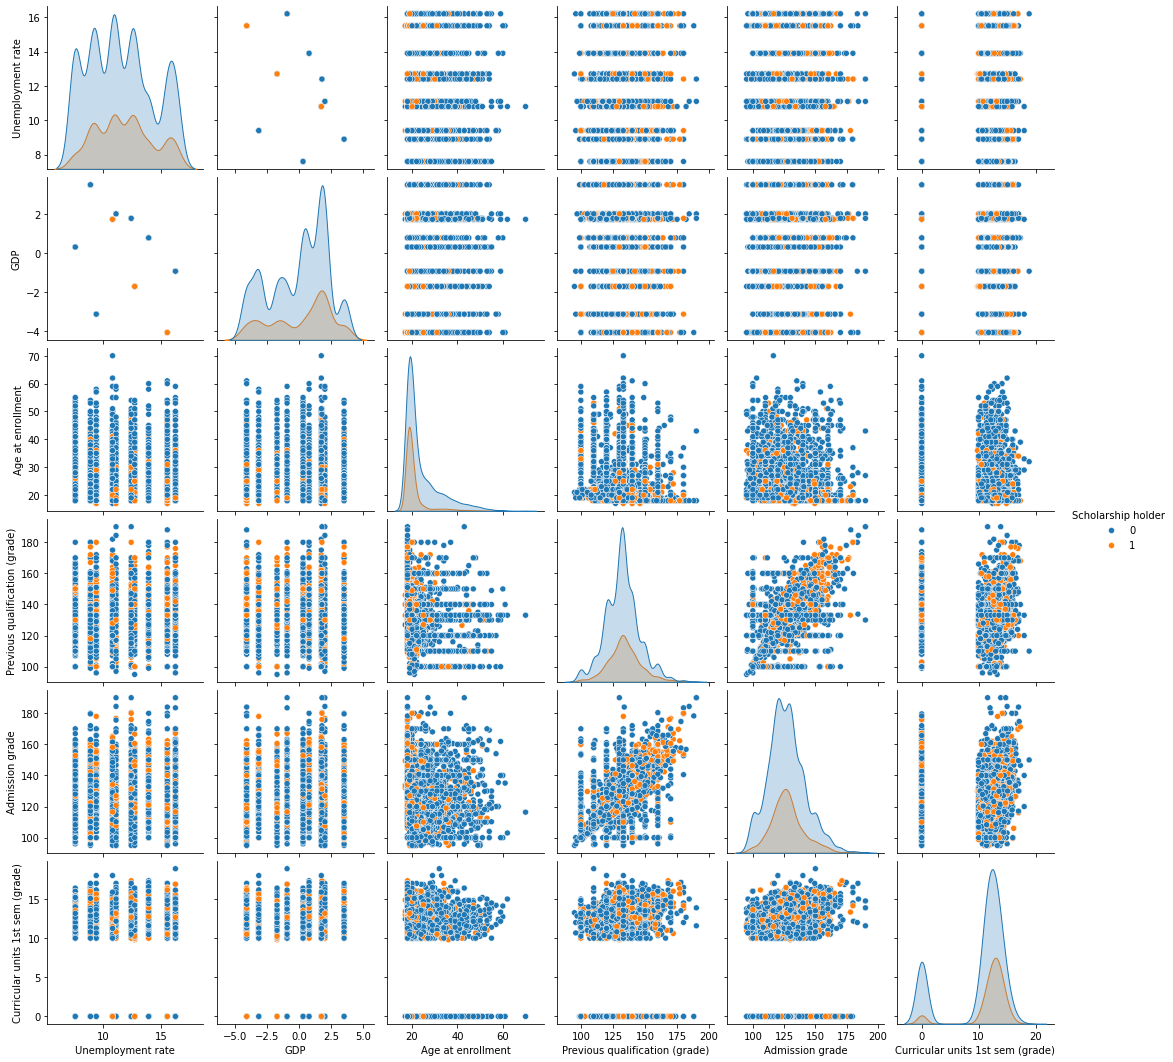

In [176]:
g7=df[["Unemployment rate","GDP","Age at enrollment","Previous qualification (grade)","Scholarship holder","Admission grade","Curricular units 1st sem (grade)"]]
sns.pairplot(data=g7,hue="Scholarship holder")